<a href="https://colab.research.google.com/github/BrunoRSalles/Experi-ncia-vs-Sal-rio/blob/main/Projeto_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
# **Projeto de dados Financeiros**




Neste projeto vamos observar o Tempo de Experiência vs Salário

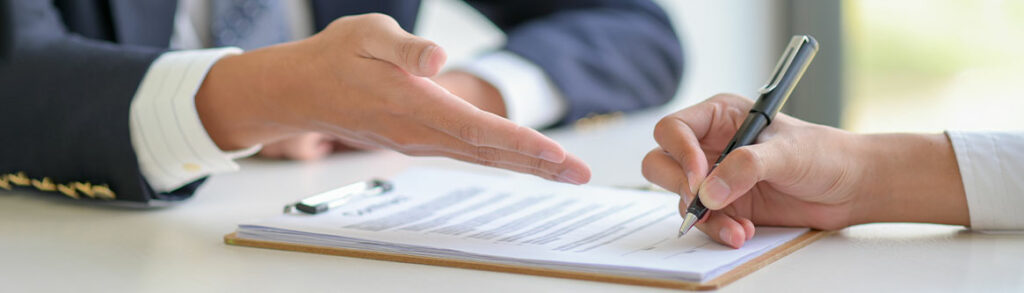

[Download da Base de Dados](https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?datasetId=10624&sortBy=voteCount)

In [ ]:
# Importando Bibliotecas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importando base de dados
base = pd.read_csv( 'Salary_Data.csv' )

In [ ]:
base.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Tamanho da Base
base.shape

(30, 2)

In [ ]:
#Verificando Nulos
base.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Verificando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# Renomeando nomes das colunas 
base.rename( columns = { 
    'YearsExperience	' : 'Xp',
    'Salary' : 'Renda Anual'
 }, inplace = True )

Vamos criar uma coluna de salário para termos mais algum parametro a ser analisado, ja que temos dados apenas anuais 

In [ ]:
# Criando uma coluna de salario 

base[ 'Salario' ] = base['Renda Anual'] / 12

pd.set_option ( 'display.precision', 2 ) 
# comando para formatar os valores float que passam das 2 casas decimais

base.head(10)

,YearsExperience,Renda Anual,Salario
0,1.1,39343.0,3278.58
1,1.3,46205.0,3850.42
2,1.5,37731.0,3144.25
3,2.0,43525.0,3627.08
4,2.2,39891.0,3324.25
5,2.9,56642.0,4720.17
6,3.0,60150.0,5012.50
7,3.2,54445.0,4537.08
8,3.2,64445.0,5370.42
9,3.7,57189.0,4765.75


In [ ]:
base.describe()

,YearsExperience,Renda Anual,Salario
count,30.00,30.00,30.00
mean,5.31,76003.00,6333.58
std,2.84,27414.43,2284.54
min,1.10,37731.00,3144.25
25%,3.20,56720.75,4726.73
50%,4.70,65237.00,5436.42
75%,7.70,100544.75,8378.73
max,10.50,122391.00,10199.25


Com os dados da Descrição podemos observar : 
- O menor tempo de experiência é de 1 ano e 10 meses, com salario de 3.144
- O maior tempo de experiência é de 10 anos e meio, com salário de 10.199
- A média de salário da empresa esta na casa de seis mil
- A média de experiência é de 5 anos
- Temos um desvio padrão de 2.284 de salário, significa que os salarios podem chegar até 2.284 de diferença de um para o outro tanto pra mais quanto pra menos


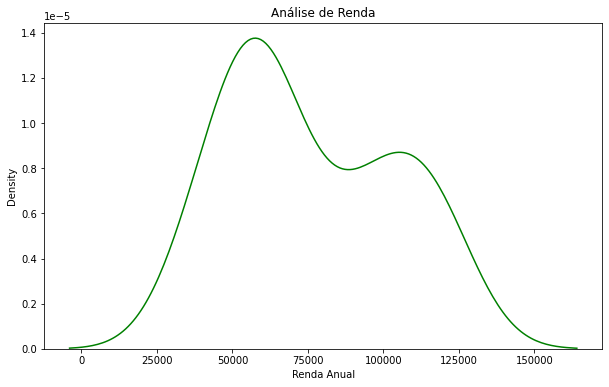

In [ ]:
plt.figure( figsize = ( 10,6 ) )
plt.title ( 'Análise de Renda' )
sns.kdeplot( base['Renda Anual'], color = 'green' );

Nesse grafico podemos observar melhor os pontos minimos e maximos dos nossos dados. Também podemos observar a região onde se tem a maior concentração de renda. E também observar que existem duas densidades de grupos com rendas acimas ou abaixo dos 90 mil anuais 

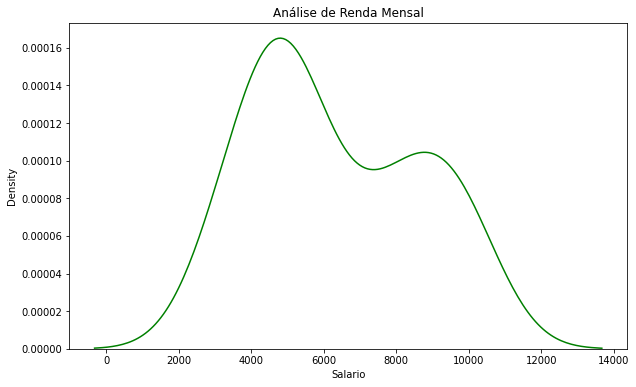

In [ ]:
plt.figure( figsize = ( 10,6 ) )
plt.title ( 'Análise de Renda Mensal' )
sns.kdeplot( base['Salario'], color = 'green' );

Os dados aqui não mudam do grafico acima, apenas temos uma representação dos salarios mensais

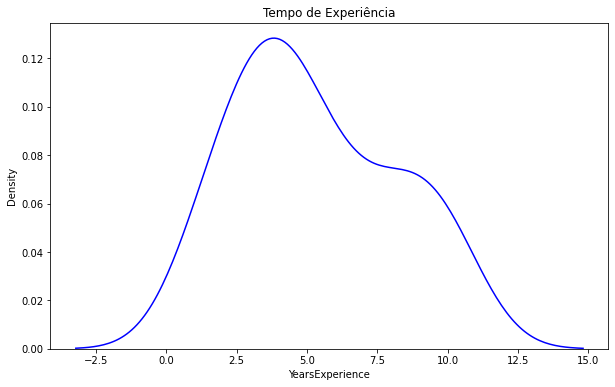

In [ ]:
plt.figure( figsize = ( 10,6 ) )
plt.title ( 'Tempo de Experiência' )
sns.kdeplot( base['YearsExperience'], color = 'blue' );

Sabemos que a média de experiencia é de 5 anos na empresa, porem como podemos observar, temos que a maior massa de pessoas esta concentrada em tempo de experiência entre 1 ano e meio e 5 anos de experiencia
Passado os 6 anos de experiência a quantidade de pessoas vai diminuindo 

Analisando a distribuição dos valores de Renda Anual


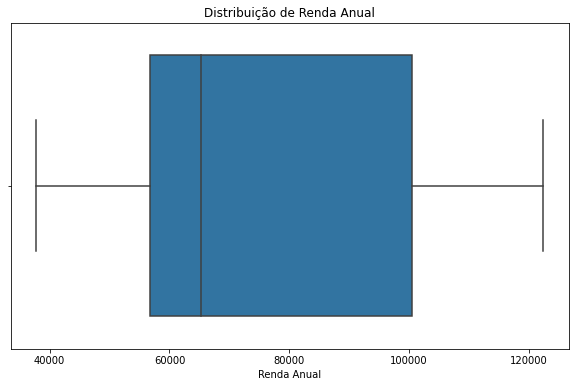

In [ ]:
plt.figure( figsize = ( 10,6 ) )
plt.title( 'Distribuição de Renda Anual' )
sns.boxplot( base['Renda Anual'] );

Podemos observar que não possuimos valores outleirs

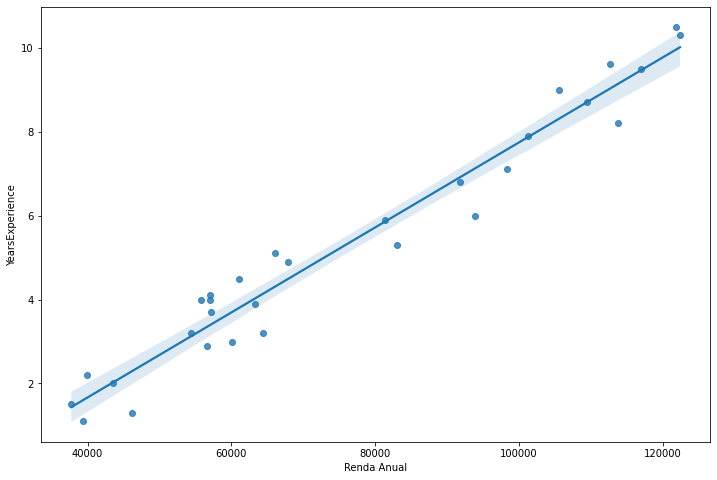

In [ ]:
plt.figure( figsize = ( 12, 8) )
sns.regplot( data = base, x = 'Renda Anual', y = 'YearsExperience' );

Esse novo grafico nos mostra que existe uma correlação entre o tempo de experiêcia e a renda. Observamos que quanto maior for sua experiência, maior sua renda ou vice versa

In [ ]:
base.corr()

,YearsExperience,Renda Anual,Salario
YearsExperience,1.00,0.98,0.98
Renda Anual,0.98,1.00,1.00
Salario,0.98,1.00,1.00


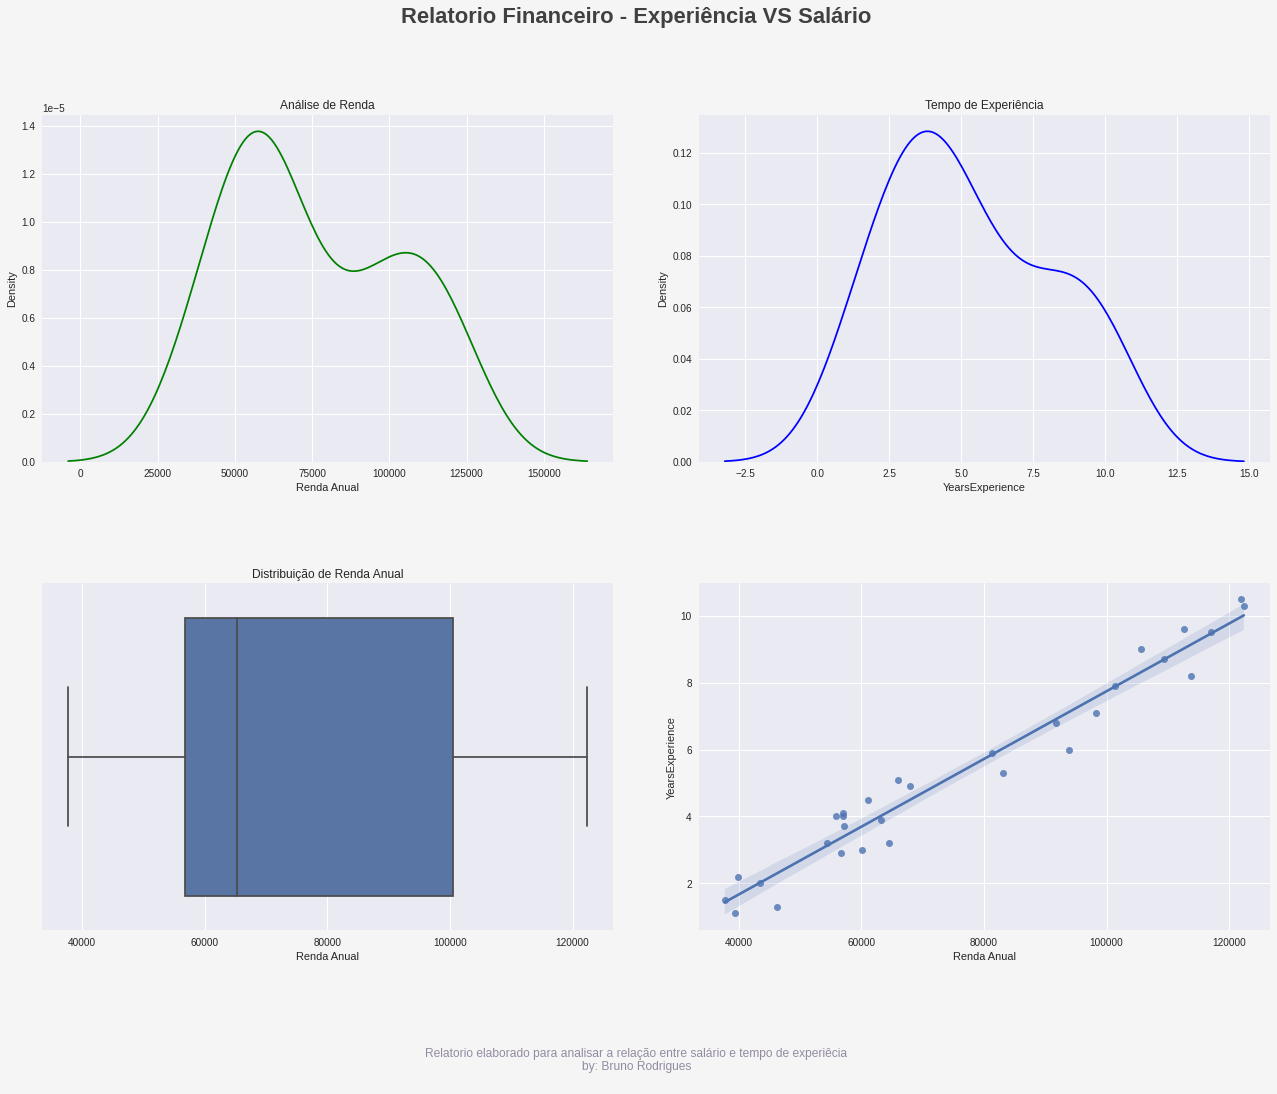

In [ ]:
# Relatorio

# Tam da Imagem

fig, ax = plt.subplots( figsize = ( 22,15 ) ) 

# Cor de Fundo do Relatorio
cfundo = '#f5f5f5'
ax.set_facecolor( cfundo )
fig.set_facecolor( cfundo )

# Estilo do grafico
plt.style.use( 'seaborn' )

# Titulo do relatorio
plt.suptitle( 'Relatorio Financeiro - Experiência VS Salário', fontsize = 22, color = '#404040', fontweight = 600 )

# Parametro do grid
linhas = 2
colunas = 2

#____________________________________________________________Acessando grafico 1
plt.subplot( linhas, colunas, 1 )

plt.title ( 'Análise de Renda' )
sns.kdeplot( base['Renda Anual'], color = 'green');
#____________________________________________________________Acessando grafico 2
plt.subplot( linhas, colunas, 2 )

plt.title ( 'Tempo de Experiência' )
sns.kdeplot( base['YearsExperience'], color = 'blue' );
#____________________________________________________________Acessando grafico 3
plt.subplot( linhas, colunas, 3 )

plt.title( 'Distribuição de Renda Anual' )
sns.boxplot( base['Renda Anual'] );
#____________________________________________________________Acessando grafico 4
plt.subplot( linhas, colunas, 4 )

sns.regplot( data = base, x = 'Renda Anual', y = 'YearsExperience' );

# Ajustando Layout - para um grafico não sobrepor o outro. Usando parametro para espaçar as colunas e as linhas 
plt.subplots_adjust( hspace = 0.35, wspace = 0.15  )

# Rodapé
rodape = '''
Relatorio elaborado para analisar a relação entre salário e tempo de experiêcia
by: Bruno Rodrigues
'''

# Incluindo o rodape
fig.text( 0.5, -0.02, rodape, ha='center', va='bottom', size = 12, color = '#938ca1' );
